# OpenET SSEBop - Collection Example

Compute a fraction of reference ET (ETf) image collection from a Landsat 8 image collection by mapping the SSEBop function.

In [1]:
import pprint
import pprint

import ee
from IPython.display import Image

import openet.ssebop as ssebop

ee.Initialize()

### Input parameters

In [2]:
# Date range you want to aggregate ET over
start_date = '2017-06-01'
end_date = '2017-08-31'

# Only keep images with an average cloud cover less than
cloud_cover = 70

# Use a single point for the filterBounds call in order to only include path 44 / row 33 images
filter_area = ee.Geometry.Point(-121.6, 38.9)
study_area = ee.Geometry.Rectangle(-122.50, 38.50, -121.00, 39.50)

study_region = study_area.bounds(1, 'EPSG:4326').coordinates().getInfo()
study_crs = 'EPSG:32610'

ndvi_palette = ['#EFE7E1', '#003300']
et_palette = [
  'DEC29B', 'E6CDA1', 'EDD9A6', 'F5E4A9', 'FFF4AD', 'C3E683', '6BCC5C', 
  '3BB369', '20998F', '1C8691', '16678A', '114982', '0B2C7A']

### Landsat 8 Collection 1 TOA Image Collection

In [3]:
# Build the input Landsat TOA collection
landsat_coll = ee.ImageCollection('LANDSAT/LC08/C01/T1_RT_TOA') \
    .filterDate(start_date, end_date) \
    .filterBounds(filter_area) \
    .filterMetadata('CLOUD_COVER_LAND', 'less_than', cloud_cover) \
    .filterMetadata('DATA_TYPE', 'equals', 'L1TP')

pprint.pprint(list(landsat_coll.aggregate_histogram('system:index').getInfo().keys()))

['LC08_044033_20170614',
 'LC08_044033_20170630',
 'LC08_044033_20170716',
 'LC08_044033_20170801',
 'LC08_044033_20170817']


### ET Fraction Collection

In [4]:
# Compute ETf for each Landsat scene
def compute_et_fraction(image):
    return ee.Image(ssebop.Image.from_landsat_c1_toa(toa_image=ee.Image(image)).etf)

et_fraction_coll = ee.ImageCollection(landsat_coll.map(compute_et_fraction))

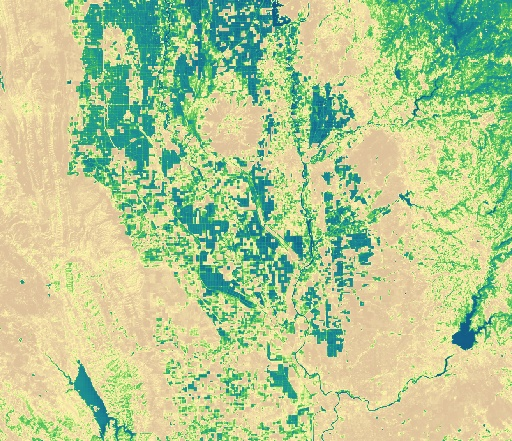

In [5]:
Image(url=ee.Image(et_fraction_coll.mean()) \
        .reproject(crs=study_crs, scale=100) \
        .getThumbURL({'region': study_region, 'min': 0.0, 'max': 1.2, 'palette': ','.join(et_palette)}),
      embed=True, format='png')

In [6]:
pprint.pprint(et_fraction_coll.getInfo()['features'])

[{'bands': [{'crs': 'EPSG:32610',
             'crs_transform': [30.0, 0.0, 500085.0, 0.0, -30.0, 4423215.0],
             'data_type': {'max': 1.05,
                           'min': 0.0,
                           'precision': 'double',
                           'type': 'PixelType'},
             'dimensions': [7661, 7791],
             'id': 'etf'}],
  'properties': {'TCORR': 0.985231799322338,
                 'TCORR_INDEX': 0,
                 'system:index': 'LC08_044033_20170614',
                 'system:time_start': 1497465922990},
  'type': 'Image'},
 {'bands': [{'crs': 'EPSG:32610',
             'crs_transform': [30.0, 0.0, 500685.0, 0.0, -30.0, 4423215.0],
             'data_type': {'max': 1.05,
                           'min': 0.0,
                           'precision': 'double',
                           'type': 'PixelType'},
             'dimensions': [7661, 7791],
             'id': 'etf'}],
  'properties': {'TCORR': 0.987428371929903,
                 'TCORR_INDEX'